## Styling

Bottlenose dolphins are [incredible creatures](https://en.wikipedia.org/wiki/Bottlenose_dolphin#:~:text=.%5B41%5D-,Physiology,-and%20senses%5B).

In [2]:
import sys
import altair as alt
import networkx as nx

".." not in sys.path and sys.path.append("..")
from alph import alph, layout, util

util.set_altair_renderer()

Source:  
http://www-personal.umich.edu/~mejn/netdata/  
https://www.kaggle.com/datasets/mashazhil/social-network-of-dolphins-in-new-zealand

In [3]:
G = nx.read_gml("./dolphins.gml", label="id")
nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness_centrality")

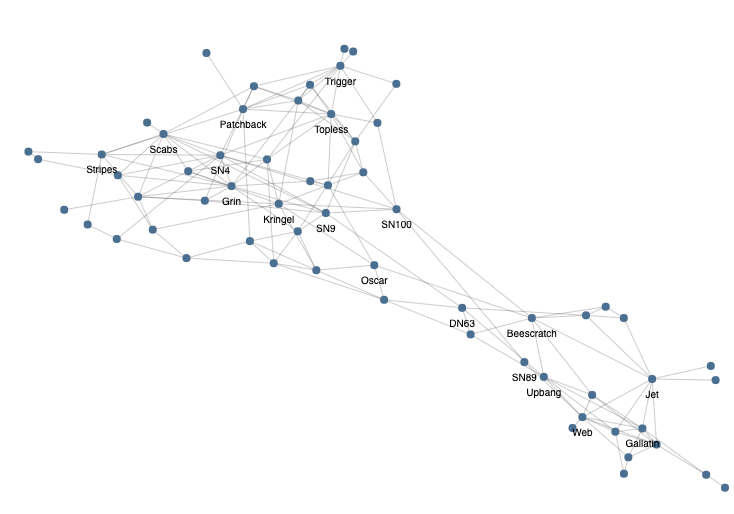

In [5]:
alph(
    G,
    layout_fn=lambda g: 
        layout.force_atlas(g, strongGravityMode=False, gravity=2, seed=123
    ),
    node_args=dict(
        size=alt.value(8**2),
        fill=alt.value("#4b6f91"),
        halo_offset=None,
        tooltip_attrs=["label"],
        label_attr=alt.condition(
            (alt.datum.degree_centrality > 0.14) | (alt.datum.betweenness_centrality > 0.05),
            "label",
            alt.value("")
        ),
    ),
    edge_args=dict(
        color="black",
        opacity=0.4,
        strokeWidth=alt.value(0.5),
    ),
).configure_view(strokeWidth=0).properties(width=720, height=500)